<a href="https://colab.research.google.com/github/ishankarve/Linear-Regression/blob/main/Multiple%20Linear%20Regression%20in%20Python/Assignment/Bike%20Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Objective**
Build a multiple linear regression model for the prediction of demand for shared bikes. 

### **Problem Statement**

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 


### **Business Goal**

Find variables are significant in predicting the demand for shared bikes and how well those variables describe the bike demands
Based on various **meteorological surveys** and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Based on the goal mentioned above, model the demand for shared bikes with the available independent variables.

### **Data Caveats**

1.   In the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as described in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. So, it is advisable to convert such feature values into categorical string values before proceeding with model building.

2.  The column 'yr' has two values 0 and 1 indicating the years 2018 and 2019 respectively. Since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 


### **Model Building**

In the dataset provided,there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. ***The model should be built taking this 'cnt' as the target variable.***

### **Step 1: Import Libraries**


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [23]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### **Step 2: Import Data**

In [24]:
#import data from gihub link
df_bikeshare=pd.read_csv("https://raw.githubusercontent.com/ishankarve/Linear-Regression/main/Multiple%20Linear%20Regression%20in%20Python/Assignment/day.csv")

In [25]:
df_bikeshare.head(730)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
5          6  06-01-2018       1   0     1        0        4           1   
6          7  07-01-2018       1   0     1        0        5           1   
7          8  08-01-2018       1   0     1        0        6           0   
8          9  09-01-2018       1   0     1        0        0           0   
9         10  10-01-2018       1   0     1        0        1           1   
10        11  11-01-2018       1   0     1        0        2           1   
11        12  12-01-2018       1   0     1        0        3           1   
12        13  13-01-2018       1   0     1        0        4           1   
13        14  14-01-2018       1   0     1        0        5           1   
14        15  15-01-2018       1   0     1        0        6           0   
15        16  16-01-2018       1   0     1        0        0           0   
16        17  17-01-2018       1   0     1        1        1           0   
17        18  18-01-2018       1   0     1        0        2           1   
18        19  19-01-2018       1   0     1        0        3           1   
19        20  20-01-2018       1   0     1        0        4           1   
20        21  21-01-2018       1   0     1        0        5           1   
21        22  22-01-2018       1   0     1        0        6           0   
22        23  23-01-2018       1   0     1        0        0           0   
23        24  24-01-2018       1   0     1        0        1           1   
24        25  25-01-2018       1   0     1        0        2           1   
25        26  26-01-2018       1   0     1        0        3           1   
26        27  27-01-2018       1   0     1        0        4           1   
27        28  28-01-2018       1   0     1        0        5           1   
28        29  29-01-2018       1   0     1        0        6           0   
29        30  30-01-2018       1   0     1        0        0           0   
..       ...         ...     ...  ..   ...      ...      ...         ...   
700      701  02-12-2019       4   1    12        0        0           0   
701      702  03-12-2019       4   1    12        0        1           1   
702      703  04-12-2019       4   1    12        0        2           1   
703      704  05-12-2019       4   1    12        0        3           1   
704      705  06-12-2019       4   1    12        0        4           1   
705      706  07-12-2019       4   1    12        0        5           1   
706      707  08-12-2019       4   1    12        0        6           0   
707      708  09-12-2019       4   1    12        0        0           0   
708      709  10-12-2019       4   1    12        0        1           1   
709      710  11-12-2019       4   1    12        0        2           1   
710      711  12-12-2019       4   1    12        0        3           1   
711      712  13-12-2019       4   1    12        0        4           1   
712      713  14-12-2019       4   1    12        0        5           1   
713      714  15-12-2019       4   1    12        0        6           0   
714      715  16-12-2019       4   1    12        0        0           0   
715      716  17-12-2019       4   1    12        0        1           1   
716      717  18-12-2019       4   1    12        0        2           1   
717      718  19-12-2019       4   1    12        0        3           1   
718      719  20-12-2019       4   1    12        0        4           1   
719      720  21-12-2019       1   1    12        0        5           1   
720      721  22-12-2019       1   1    12        0  

# **Data Dictionary**
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### **Step 3: Undertake sanity checks on data**

In [26]:
#get shape of the dataframe
df_bikeshare.shape

(730, 16)

In [27]:
#check column dtypes
df_bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [28]:
#get list of unique variables per column
print(df_bikeshare.nunique())

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


In [29]:
# get count of non-na values across all columns
df_bikeshare.apply(lambda x: x.count(), axis=0)

instant       730
dteday        730
season        730
yr            730
mnth          730
holiday       730
weekday       730
workingday    730
weathersit    730
temp          730
atemp         730
hum           730
windspeed     730
casual        730
registered    730
cnt           730
dtype: int64

In [30]:
# convert 'dteday' from 'object' to 'datetime'
df_bikeshare['dteday'] = pd.to_datetime(df_bikeshare['dteday'], format='%d-%m-%Y') #date is in 01-01-2018 format

In [31]:
#describe dataframe
df_bikeshare.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### **Step 4: Cleaning & Binning Numerical Categorical Data**

In [32]:
#using 'OR' operation for holiday and working day to make holiday column redundant
df_bikeshare['workingday']=df_bikeshare['workingday'] + df_bikeshare['holiday']
#drop 'holiday' column
df_bikeshare.drop(['holiday'], axis = 1, inplace = True)


In [33]:
# binning windspeed data as per Beaufort Scale (https://www.rmets.org/metmatters/beaufort-scale)
# Note: Since temperature is in metric units (deg Celsius), it is assumed that windspeed is in Km/Hr

#bin_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
bin_labels = ['Calm','Light_air','Light_Breeze','Gentle_Breeze','Moderate_Breeze','Fresh_Breeze','Strong_Breeze','Moderate_Gale','Fresh_Gale','Strong_Gale','Whole_Gale','Storm','Hurricane']

bins = [0, 1, 5, 11, 19, 28, 38, 49, 61, 74, 88, 102, 117,300]
df_bikeshare['windspeed_binned'] = pd.cut(df_bikeshare['windspeed'], bins=bins, labels=bin_labels)

In [34]:
# binning temperature data as per comfort Scale (http://www.city-data.com/forum/weather/1620160-your-personal-temperature-colors-descriptors.html)
# data is binned as follows
# data is binned on a scale of 1 to 12
# 12- 45C & up: extremely hot 
# 11- 40 to 45C: very hot 
# 10- 35 to 40C: hot 
# 09- 30 to 35C: quite warm 
# 08 -20 to 30C: ideal 
# 07- 15 to 20C: lower than ideal 
# 06- 10 to 15C: cool 
# 05- 5 to 10C: quite cool 
# 04- 0 to 5C: cold 
# 03 -5 to 0C: very cold 
# 02- -10 to -5C: freezing 
# 01- -15 to -10C: frigid

#bin_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
bin_labels = ['Frigid','Freezing','Very_Cold','Cold','Quite_Cool','Cool','Lower_Ideal','Ideal','Quite_Warm','Hot','Very_Hot','Extremely_Hot']
bins = [-15,-10,-5,0,5,10,15,20,30,35,40,45,60]
df_bikeshare['temp_binned'] = pd.cut(df_bikeshare['temp'], bins=bins, labels=bin_labels)

In [35]:
#extracting day from date
df_bikeshare["day"]=df_bikeshare.dteday.dt.day

In [36]:
#binning months into quarters (1st,2nd,3rd,4th)
bin_labels = ['First', 'Second', 'Third', 'Fourth']
bins = [0,3,6,8,12]
df_bikeshare['quarter_binned'] = pd.cut(df_bikeshare['mnth'], bins=bins, labels=bin_labels)

In [37]:
#binning weekday  into labelled bins
bin_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
bins = [-1,0,1,2,3,4,5,6]
df_bikeshare['weekday_binned'] = pd.cut(df_bikeshare['weekday'], bins=bins, labels=bin_labels)

In [38]:
#binning humidity  into labelled bins
bin_labels = ['Too_Dry','Much_Dry', 'Dry', 'Near_Perfect', 'Perfect','About_Perfect','Sweaty', 'Too_Humid','Gross']
bins = [0, 10, 20, 30, 40, 60, 70, 80, 90, 100]
df_bikeshare['hum_binned'] = pd.cut(df_bikeshare['hum'], bins=bins, labels=bin_labels)

In [39]:
#binning months into labelled months)
bin_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df_bikeshare['mnth_binned'] = pd.cut(df_bikeshare['mnth'], bins=bins, labels=bin_labels)

In [40]:
#binning months into labelled months)
bin_labels = ['Clear', 'Cloudy', 'Light_RainSnow', 'Heavy_RainSnow']
bins = [0, 1, 2, 3, 4]
df_bikeshare['weathersit_binned'] = pd.cut(df_bikeshare['weathersit'], bins=bins, labels=bin_labels)

In [41]:
#binning seasons into labelled variables
bin_labels = ['Spring', 'Summer', 'Autumn', 'Winter']
bins = [0, 1, 2, 3, 4]
df_bikeshare['season_binned'] = pd.cut(df_bikeshare['season'], bins=bins, labels=bin_labels)

### **Step 5: Prelimnary Visualisation**
Since all data is numeric, we can use plots to visualise data 

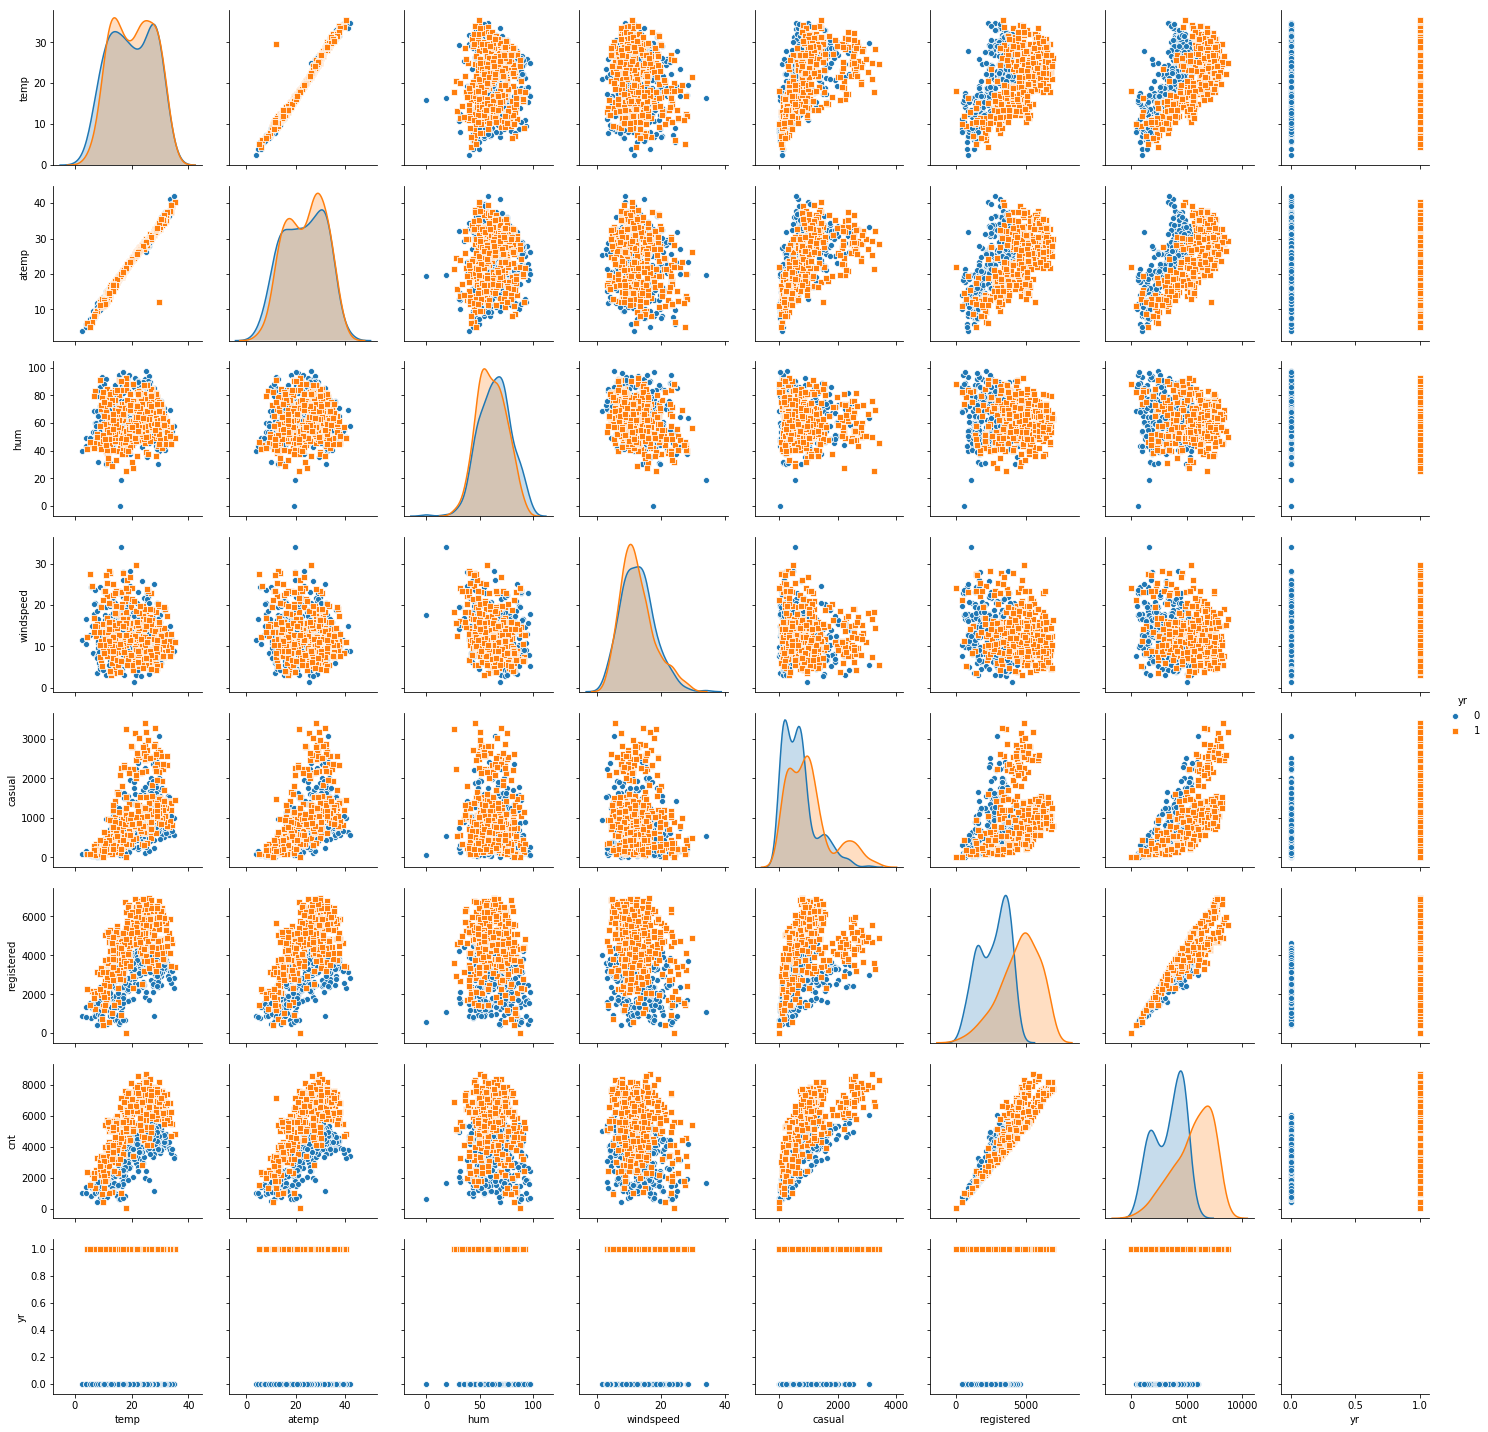

In [42]:
#plotting pairplot of continious variables
#Reference: https://stackoverflow.com/questions/64556501/plot-only-some-columns-with-seaborn-pairplot
cols_to_plot = df_bikeshare.columns[8:15].tolist() + ['yr'] # explicitly add the column "yr" to your list of columns to plot
sns.pairplot(df_bikeshare[cols_to_plot], hue ="yr", markers=["o", "s"])
plt.show()


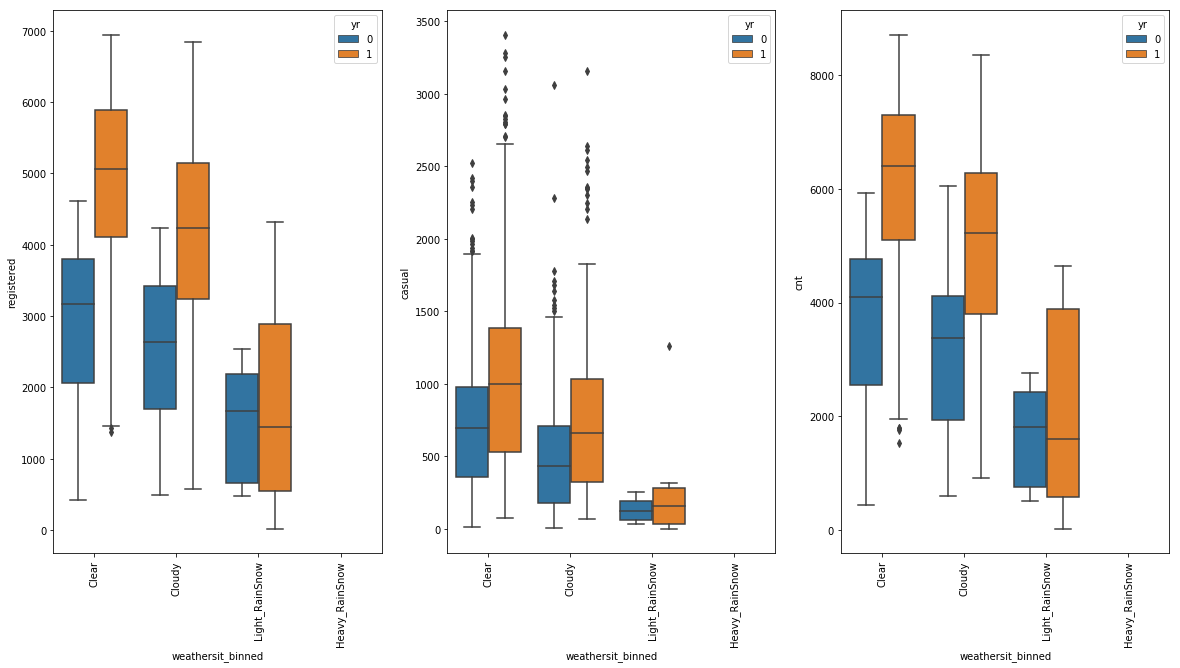

In [43]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'weathersit_binned', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,2)
sns.boxplot(x = 'weathersit_binned', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,3)
sns.boxplot(x = 'weathersit_binned', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.show()

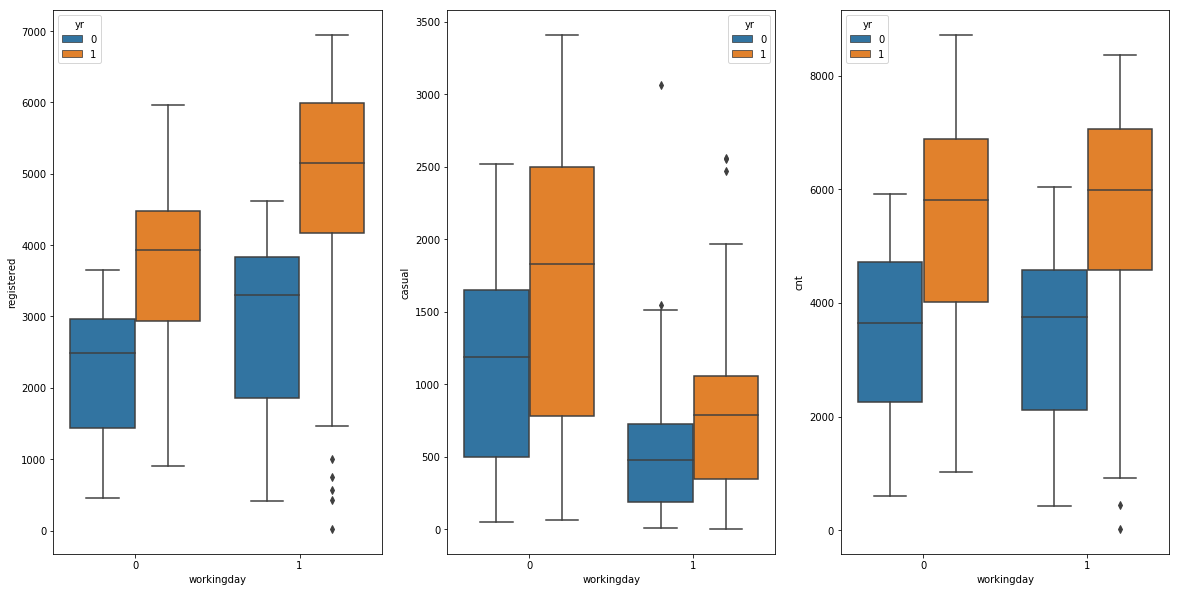

In [44]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'workingday', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'workingday', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.show()

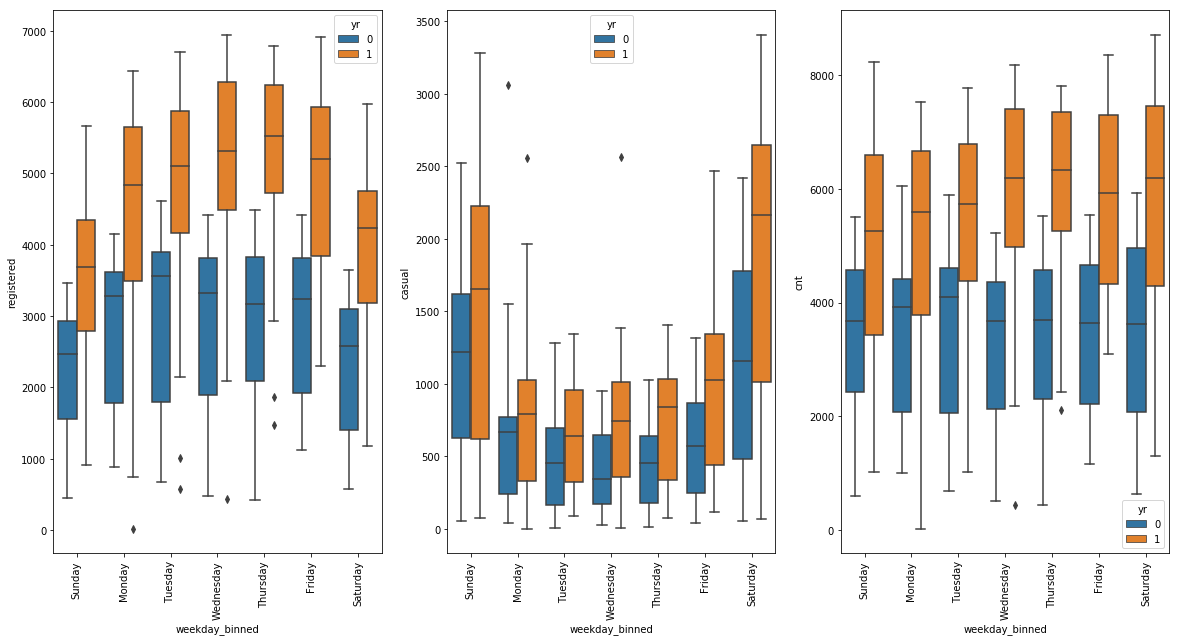

In [45]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'weekday_binned', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,2)
sns.boxplot(x = 'weekday_binned', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,3)
sns.boxplot(x = 'weekday_binned', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.show()

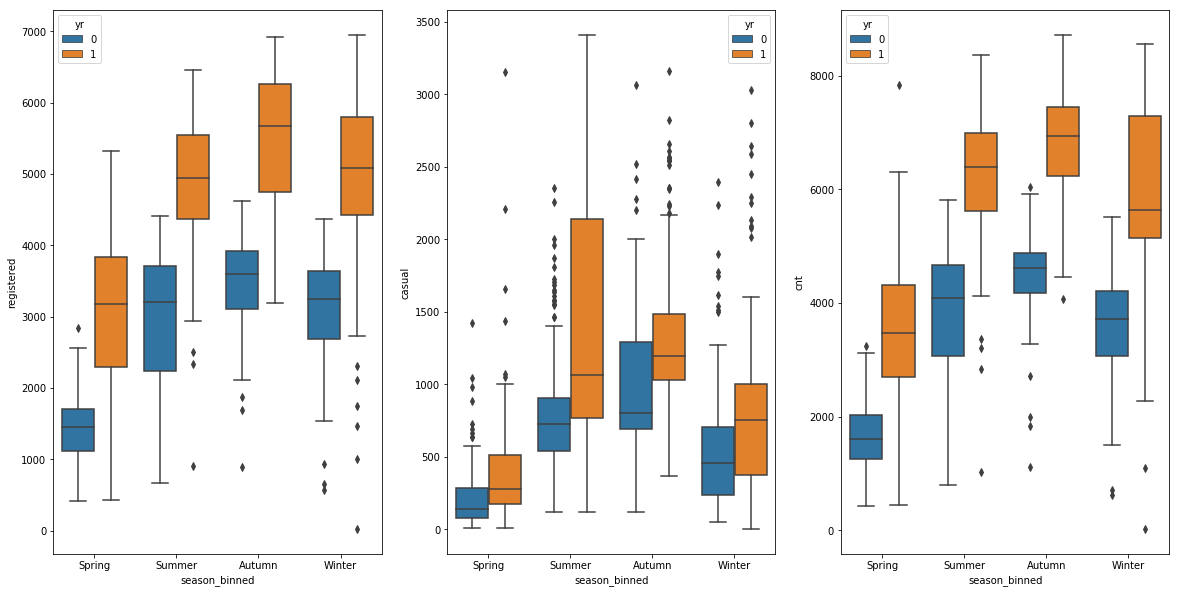

In [46]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'season_binned', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'season_binned', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'season_binned', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.show()

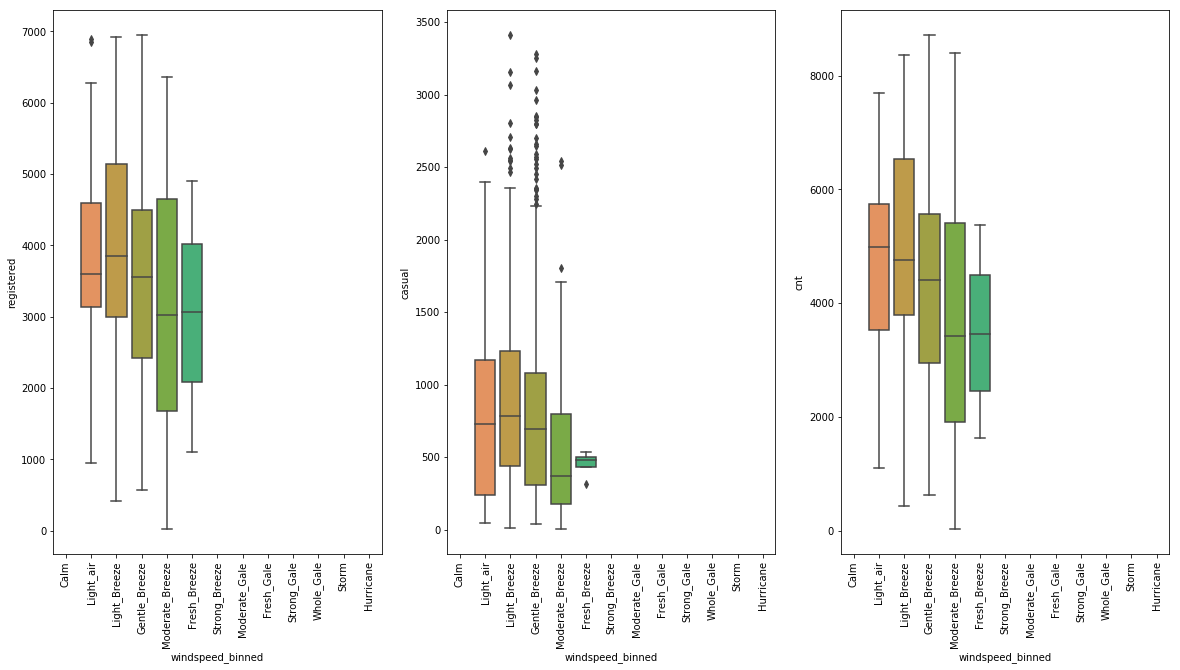

In [47]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'windspeed_binned', y = 'registered', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,2)
sns.boxplot(x = 'windspeed_binned', y = 'casual', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,3)
sns.boxplot(x = 'windspeed_binned', y = 'cnt', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.show()

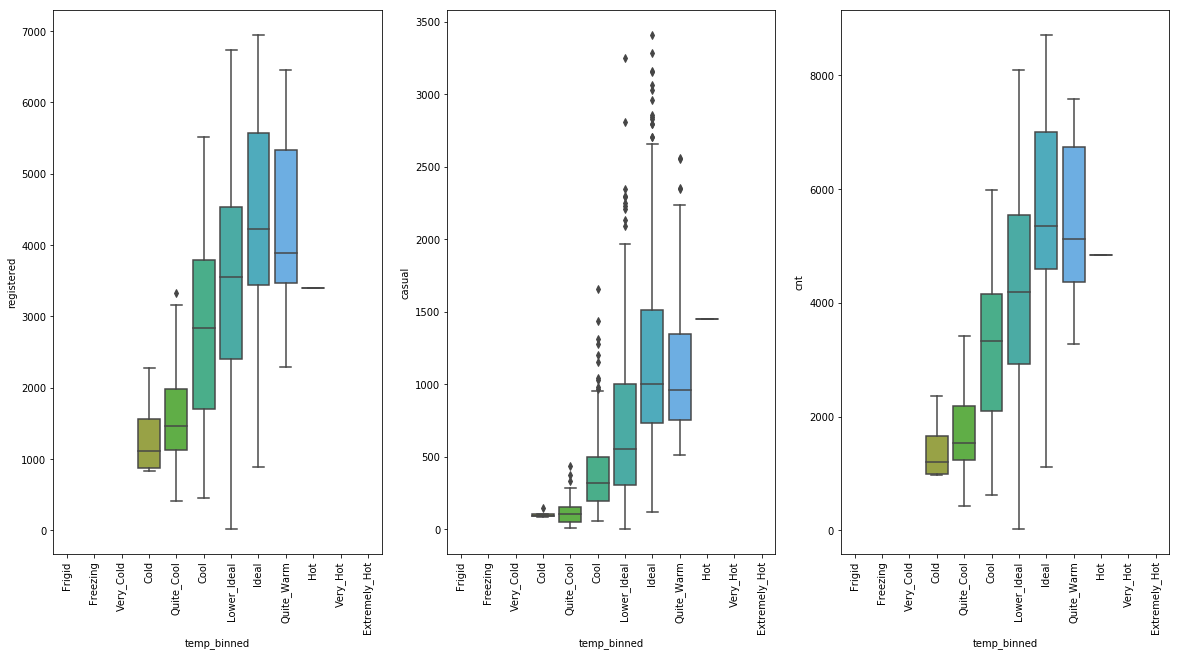

In [48]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'temp_binned', y = 'registered', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,2)
sns.boxplot(x = 'temp_binned', y = 'casual', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,3)
sns.boxplot(x = 'temp_binned', y = 'cnt', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.show()

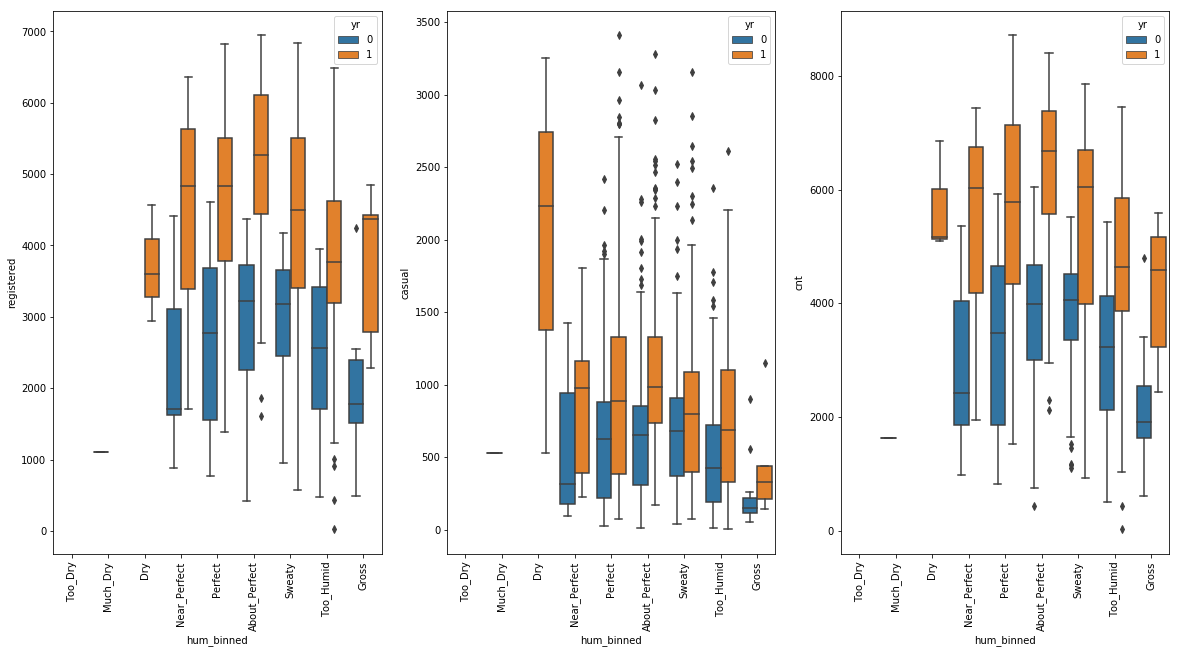

In [49]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'hum_binned', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,2)
sns.boxplot(x = 'hum_binned', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,3)
sns.boxplot(x = 'hum_binned', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.show()

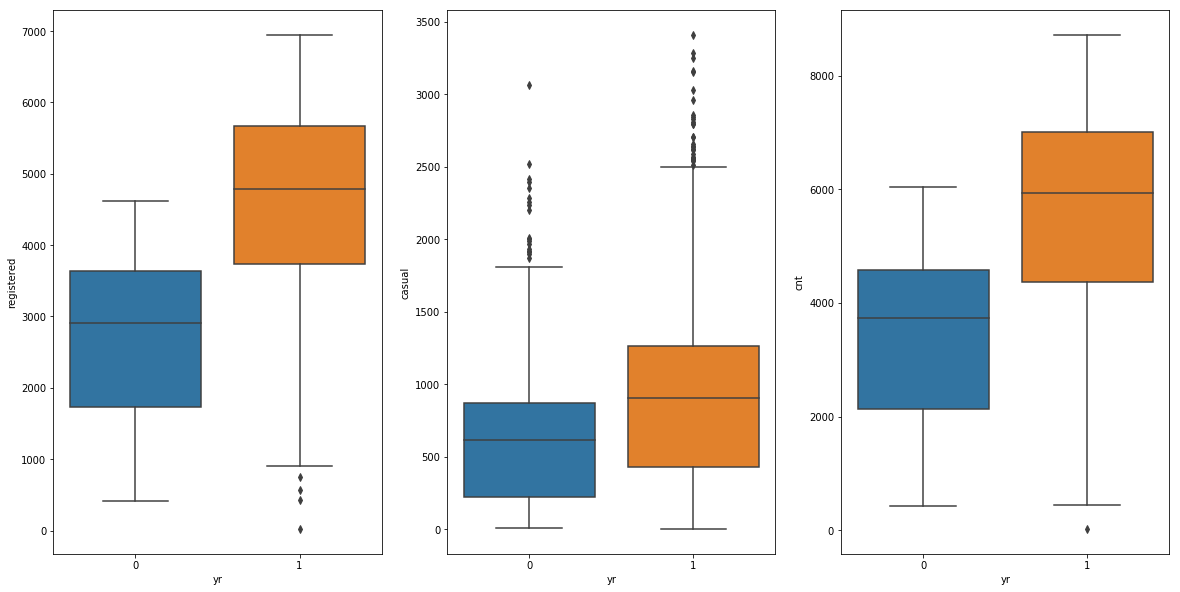

In [50]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'yr', y = 'registered', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'yr', y = 'casual', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bikeshare)
plt.show()

In [51]:
#plot chart per day to find specific days where surge can be expected

In [52]:
#plot variation across months
# perform groupby
df = df_bikeshare.groupby(['mnth_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="mnth_binned",y="ridership",hue="yr",data=df)
plt.xticks(rotation='vertical')
plt.show()

TypeError: aggregate() missing 1 required positional argument: 'arg'

In [ ]:
#plot variation across quarters
# perform groupby
df = df_bikeshare.groupby(['quarter_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="quarter_binned",y="ridership",hue='yr',data=df)

plt.show()

In [ ]:
#plot variation across weekdays
# perform groupby
df = df_bikeshare.groupby(['weekday_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="weekday_binned",y="ridership",hue='yr',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#plot variation across temperature conditions
# perform groupby
df = df_bikeshare.groupby(['temp_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="temp_binned",y="ridership",hue='yr',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#plot variation across humidity conditions
# perform groupby
df = df_bikeshare.groupby(['hum_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="hum_binned",y="ridership",hue='yr',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#check relationship of casual, registered and total cnt
df = df_bikeshare.query("yr == 0")
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.lineplot(data=df, x="mnth", y="cnt")
plt.subplot(1,3,2)
sns.lineplot(data=df, x="mnth", y="registered")
plt.subplot(1,3,3)
sns.lineplot(data=df, x="mnth", y="casual")
plt.show()

In [ ]:
#to ascertain relationship check with normalised values
#set up scaler
plot_scaler = MinMaxScaler()
plt.figure(figsize=(20, 5))
# Apply scaler() only to three specific columns
num_vars=["casual","registered","cnt"]
df[num_vars] = scaler.fit_transform(df[num_vars])

plt.subplot(1,2,1)
df = df_bikeshare.query("yr == 0")
sns.lineplot(data=df, x="mnth", y="cnt")
sns.lineplot(data=df, x="mnth", y="registered")
sns.lineplot(data=df, x="mnth", y="casual")

plt.subplot(1,2,2)
df = df_bikeshare.query("yr == 1")
sns.lineplot(data=df, x="mnth", y="cnt")
sns.lineplot(data=df, x="mnth", y="registered")
sns.lineplot(data=df, x="mnth", y="casual")

plt.show()

In [ ]:
#plot variation across day
# perform groupby
df = df_bikeshare.groupby(['day','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
#plot barplot
sns.barplot(x="day",y="ridership",hue='yr',data=df)

plt.show()

In [ ]:
print(df_bikeshare.nunique())

In [ ]:
df_bikeshare.columns

### **Step 6: Creating Dummy Variables**

In [54]:
#create dummy variables for binned categorial variables
windspeed_dummy = pd.get_dummies(df_bikeshare['windspeed_binned'],drop_first=True)
temp_dummy = pd.get_dummies(df_bikeshare['temp_binned'],drop_first=True)
quarter_dummy = pd.get_dummies(df_bikeshare['quarter_binned'],drop_first=True)
weathersit_dummy = pd.get_dummies(df_bikeshare['weathersit_binned'],drop_first=True)
weekday_dummy = pd.get_dummies(df_bikeshare['weekday_binned'],drop_first=True)
hum_dummy = pd.get_dummies(df_bikeshare['hum_binned'],drop_first=True)
mnth_dummy = pd.get_dummies(df_bikeshare['mnth_binned'],drop_first=True)
season_dummy = pd.get_dummies(df_bikeshare['season_binned'],drop_first=True)

In [55]:
#drop corresponding categorical variables
#Reference: https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
df_bikeshare.drop(list(df_bikeshare.filter(regex = 'binned')), axis = 1, inplace = True)

In [56]:
#check dataframe for columns deletion
df_bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day'],
      dtype='object')

In [57]:
#check variables
print(windspeed_dummy.nunique())
print(temp_dummy.nunique())
print(quarter_dummy.nunique())
print(weathersit_dummy.nunique())
print(weekday_dummy.nunique())
print(hum_dummy.nunique())
print(mnth_dummy.nunique())
print(season_dummy.nunique())

Light_air          2
Light_Breeze       2
Gentle_Breeze      2
Moderate_Breeze    2
Fresh_Breeze       2
Strong_Breeze      1
Moderate_Gale      1
Fresh_Gale         1
Strong_Gale        1
Whole_Gale         1
Storm              1
Hurricane          1
dtype: int64
Freezing         1
Very_Cold        1
Cold             2
Quite_Cool       2
Cool             2
Lower_Ideal      2
Ideal            2
Quite_Warm       2
Hot              2
Very_Hot         1
Extremely_Hot    1
dtype: int64
Second    2
Third     2
Fourth    2
dtype: int64
Cloudy            2
Light_RainSnow    2
Heavy_RainSnow    1
dtype: int64
Monday       2
Tuesday      2
Wednesday    2
Thursday     2
Friday       2
Saturday     2
dtype: int64
Much_Dry         2
Dry              2
Near_Perfect     2
Perfect          2
About_Perfect    2
Sweaty           2
Too_Humid        2
Gross            2
dtype: int64
Feb    2
Mar    2
Apr    2
May    2
Jun    2
Jul    2
Aug    2
Sep    2
Oct    2
Nov    2
Dec    2
dtype: int64
Summer    2

In [58]:
#concat dummy variable dataframe to the main dataframe
# df_bikeshare = pd.concat([df_bikeshare, windspeed_dummy], axis = 1)
# df_bikeshare = pd.concat([df_bikeshare, temp_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, weathersit_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, weekday_dummy], axis = 1)                         
# df_bikeshare = pd.concat([df_bikeshare, hum_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, mnth_dummy], axis = 1)
# df_bikeshare = pd.concat([df_bikeshare, quarter_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, season_dummy], axis = 1)

In [59]:
#check dataframe for columns concatenation
df_bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day', 'Cloudy', 'Light_RainSnow',
       'Heavy_RainSnow', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec', 'Summer', 'Autumn', 'Winter'],
      dtype='object')

In [60]:
#drop columns where there is no variable diversity
for col in df_bikeshare.columns:
    if len(df_bikeshare[col].unique()) == 1:
        df_bikeshare.drop(col,inplace=True,axis=1)

In [61]:
#check master dataframe
print(df_bikeshare.nunique())


instant           730
dteday            730
season              4
yr                  2
mnth               12
weekday             7
workingday          2
weathersit          3
temp              498
atemp             689
hum               594
windspeed         649
casual            605
registered        678
cnt               695
day                31
Cloudy              2
Light_RainSnow      2
Monday              2
Tuesday             2
Wednesday           2
Thursday            2
Friday              2
Saturday            2
Feb                 2
Mar                 2
Apr                 2
May                 2
Jun                 2
Jul                 2
Aug                 2
Sep                 2
Oct                 2
Nov                 2
Dec                 2
Summer              2
Autumn              2
Winter              2
dtype: int64


In [62]:
df_bikeshare.columns.tolist()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'day',
 'Cloudy',
 'Light_RainSnow',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Summer',
 'Autumn',
 'Winter']

In [63]:
#drop original categorical and redundant columns
df_bikeshare.drop([
 'instant',
 'dteday',
#  'season',
#   'yr',
#  'mnth',
#  'weekday',
#   'workingday',
#  'weathersit',
#   'temp',
#  'atemp',
#  'hum',
#  'windspeed',
   'casual',
  'registered'
#   'cnt',
#  'day',
#  'Light_air',
#  'Light_Breeze',
#  'Gentle_Breeze',
#  'Moderate_Breeze',
#  'Fresh_Breeze',
#  'Cold',
#  'Quite_Cool',
#  'Cool',
#  'Lower_Ideal',
#  'Ideal',
#  'Quite_Warm',
#  'Hot',
#  'Cloudy',
#  'Light_RainSnow',
#  'Monday',
#  'Tuesday',
#  'Wednesday',
#  'Thursday',
#  'Friday',
#  'Saturday',
#  'Much_Dry',
#  'Dry',
#  'Near_Perfect',
#  'Perfect',
#  'About_Perfect',
#  'Sweaty',
#  'Too_Humid',
#  'Gross',
#  'Feb',
#  'Mar',
#  'Apr',
#  'May',
#  'Jun',
#  'Jul',
#  'Aug',
#  'Sep',
#  'Oct',
#  'Nov',
#  'Dec',
#  'Second',
#  'Third',
#  'Fourth',
#  'Summer',
#  'Autumn',
#  'Winter'
 ], axis = 1, inplace = True)
df_bikeshare.head(10)

season  yr  mnth  weekday  workingday  weathersit       temp     atemp  \
0       1   0     1        6           0           2  14.110847  18.18125   
1       1   0     1        0           0           2  14.902598  17.68695   
2       1   0     1        1           1           1   8.050924   9.47025   
3       1   0     1        2           1           1   8.200000  10.60610   
4       1   0     1        3           1           1   9.305237  11.46350   
5       1   0     1        4           1           1   8.378268  11.66045   
6       1   0     1        5           1           2   8.057402  10.44195   
7       1   0     1        6           0           2   6.765000   8.11270   
8       1   0     1        0           0           1   5.671653   5.80875   
9       1   0     1        1           1           1   6.184153   7.54440   

       hum  windspeed   ...    Jun  Jul  Aug  Sep  Oct  Nov  Dec  Summer  \
0  80.5833  10.749882   ...      0    0    0    0    0    0    0       0   
1  69.6087  16.652113   ...      0    0    0    0    0    0    0       0   
2  43.7273  16.636703   ...      0    0    0    0    0    0    0       0   
3  59.0435  10.739832   ...      0    0    0    0    0    0    0       0   
4  43.6957  12.522300   ...      0    0    0    0    0    0    0       0   
5  51.8261   6.000868   ...      0    0    0    0    0    0    0       0   
6  49.8696  11.304642   ...      0    0    0    0    0    0    0       0   
7  53.5833  17.875868   ...      0    0    0    0    0    0    0       0   
8  43.4167  24.250650   ...      0    0    0    0    0    0    0       0   
9  48.2917  14.958889   ...      0    0    0    0    0    0    0       0   

   Autumn  Winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  
5       0       0  
6       0       0  
7       0       0  
8       0       0  
9       0       0  

[10 rows x 34 columns]

### **Step 7: Splitting and Scaling data**

In [64]:
#check dataframe
print(df_bikeshare.nunique())

season              4
yr                  2
mnth               12
weekday             7
workingday          2
weathersit          3
temp              498
atemp             689
hum               594
windspeed         649
cnt               695
day                31
Cloudy              2
Light_RainSnow      2
Monday              2
Tuesday             2
Wednesday           2
Thursday            2
Friday              2
Saturday            2
Feb                 2
Mar                 2
Apr                 2
May                 2
Jun                 2
Jul                 2
Aug                 2
Sep                 2
Oct                 2
Nov                 2
Dec                 2
Summer              2
Autumn              2
Winter              2
dtype: int64


In [75]:
#copy dataframe
s1_df=df_bikeshare.copy()

In [76]:
#splitting data
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(564)
s1_train, s1_test = train_test_split(s1_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [77]:
s1_train.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'day', 'Cloudy', 'Light_RainSnow',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec', 'Summer', 'Autumn', 'Winter'],
      dtype='object')

In [78]:
#set up scaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except  'cnt' variable
num_vars=s1_train.columns.tolist()
#num_vars.remove('cnt')
s1_train[num_vars] = scaler.fit_transform(s1_train[num_vars])

In [79]:
s1_train.head(10)

season   yr      mnth   weekday  workingday  weathersit      temp  \
653  1.000000  1.0  0.818182  0.333333         1.0         0.0  0.509887   
576  0.666667  1.0  0.545455  0.333333         1.0         0.0  0.815169   
426  0.000000  1.0  0.181818  1.000000         0.0         0.5  0.442393   
728  0.000000  1.0  1.000000  0.000000         0.0         0.0  0.245101   
482  0.333333  1.0  0.272727  1.000000         0.0         0.5  0.395666   
111  0.333333  0.0  0.272727  0.833333         1.0         0.5  0.345824   
580  0.666667  1.0  0.636364  1.000000         0.0         0.0  0.914852   
500  0.333333  1.0  0.363636  0.500000         1.0         0.0  0.719639   
479  0.333333  1.0  0.272727  0.500000         1.0         0.0  0.520271   
472  0.333333  1.0  0.272727  0.500000         1.0         0.5  0.503656   

        atemp       hum  windspeed   ...    Jun  Jul  Aug  Sep  Oct  Nov  Dec  \
653  0.501133  0.575354   0.300794   ...    0.0  0.0  0.0  0.0  1.0  0.0  0.0   
576  0.766351  0.725633   0.264686   ...    0.0  1.0  0.0  0.0  0.0  0.0  0.0   
426  0.438975  0.640189   0.255342   ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
728  0.200348  0.498067   0.663106   ...    0.0  0.0  0.0  0.0  0.0  0.0  1.0   
482  0.391735  0.504508   0.188475   ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
111  0.318819  0.751824   0.380981   ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
580  0.882350  0.632030   0.462538   ...    0.0  0.0  1.0  0.0  0.0  0.0  0.0   
500  0.678508  0.719193   0.172431   ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
479  0.513565  0.440962   0.164434   ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
472  0.496135  0.586518   0.270032   ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     Summer  Autumn  Winter  
653     0.0     0.0     1.0  
576     0.0     1.0     0.0  
426     0.0     0.0     0.0  
728     0.0     0.0     0.0  
482     1.0     0.0     0.0  
111     1.0     0.0     0.0  
580     0.0     1.0     0.0  
500     1.0     0.0     0.0  
479     1.0     0.0     0.0  
472     1.0     0.0     0.0  

[10 rows x 34 columns]

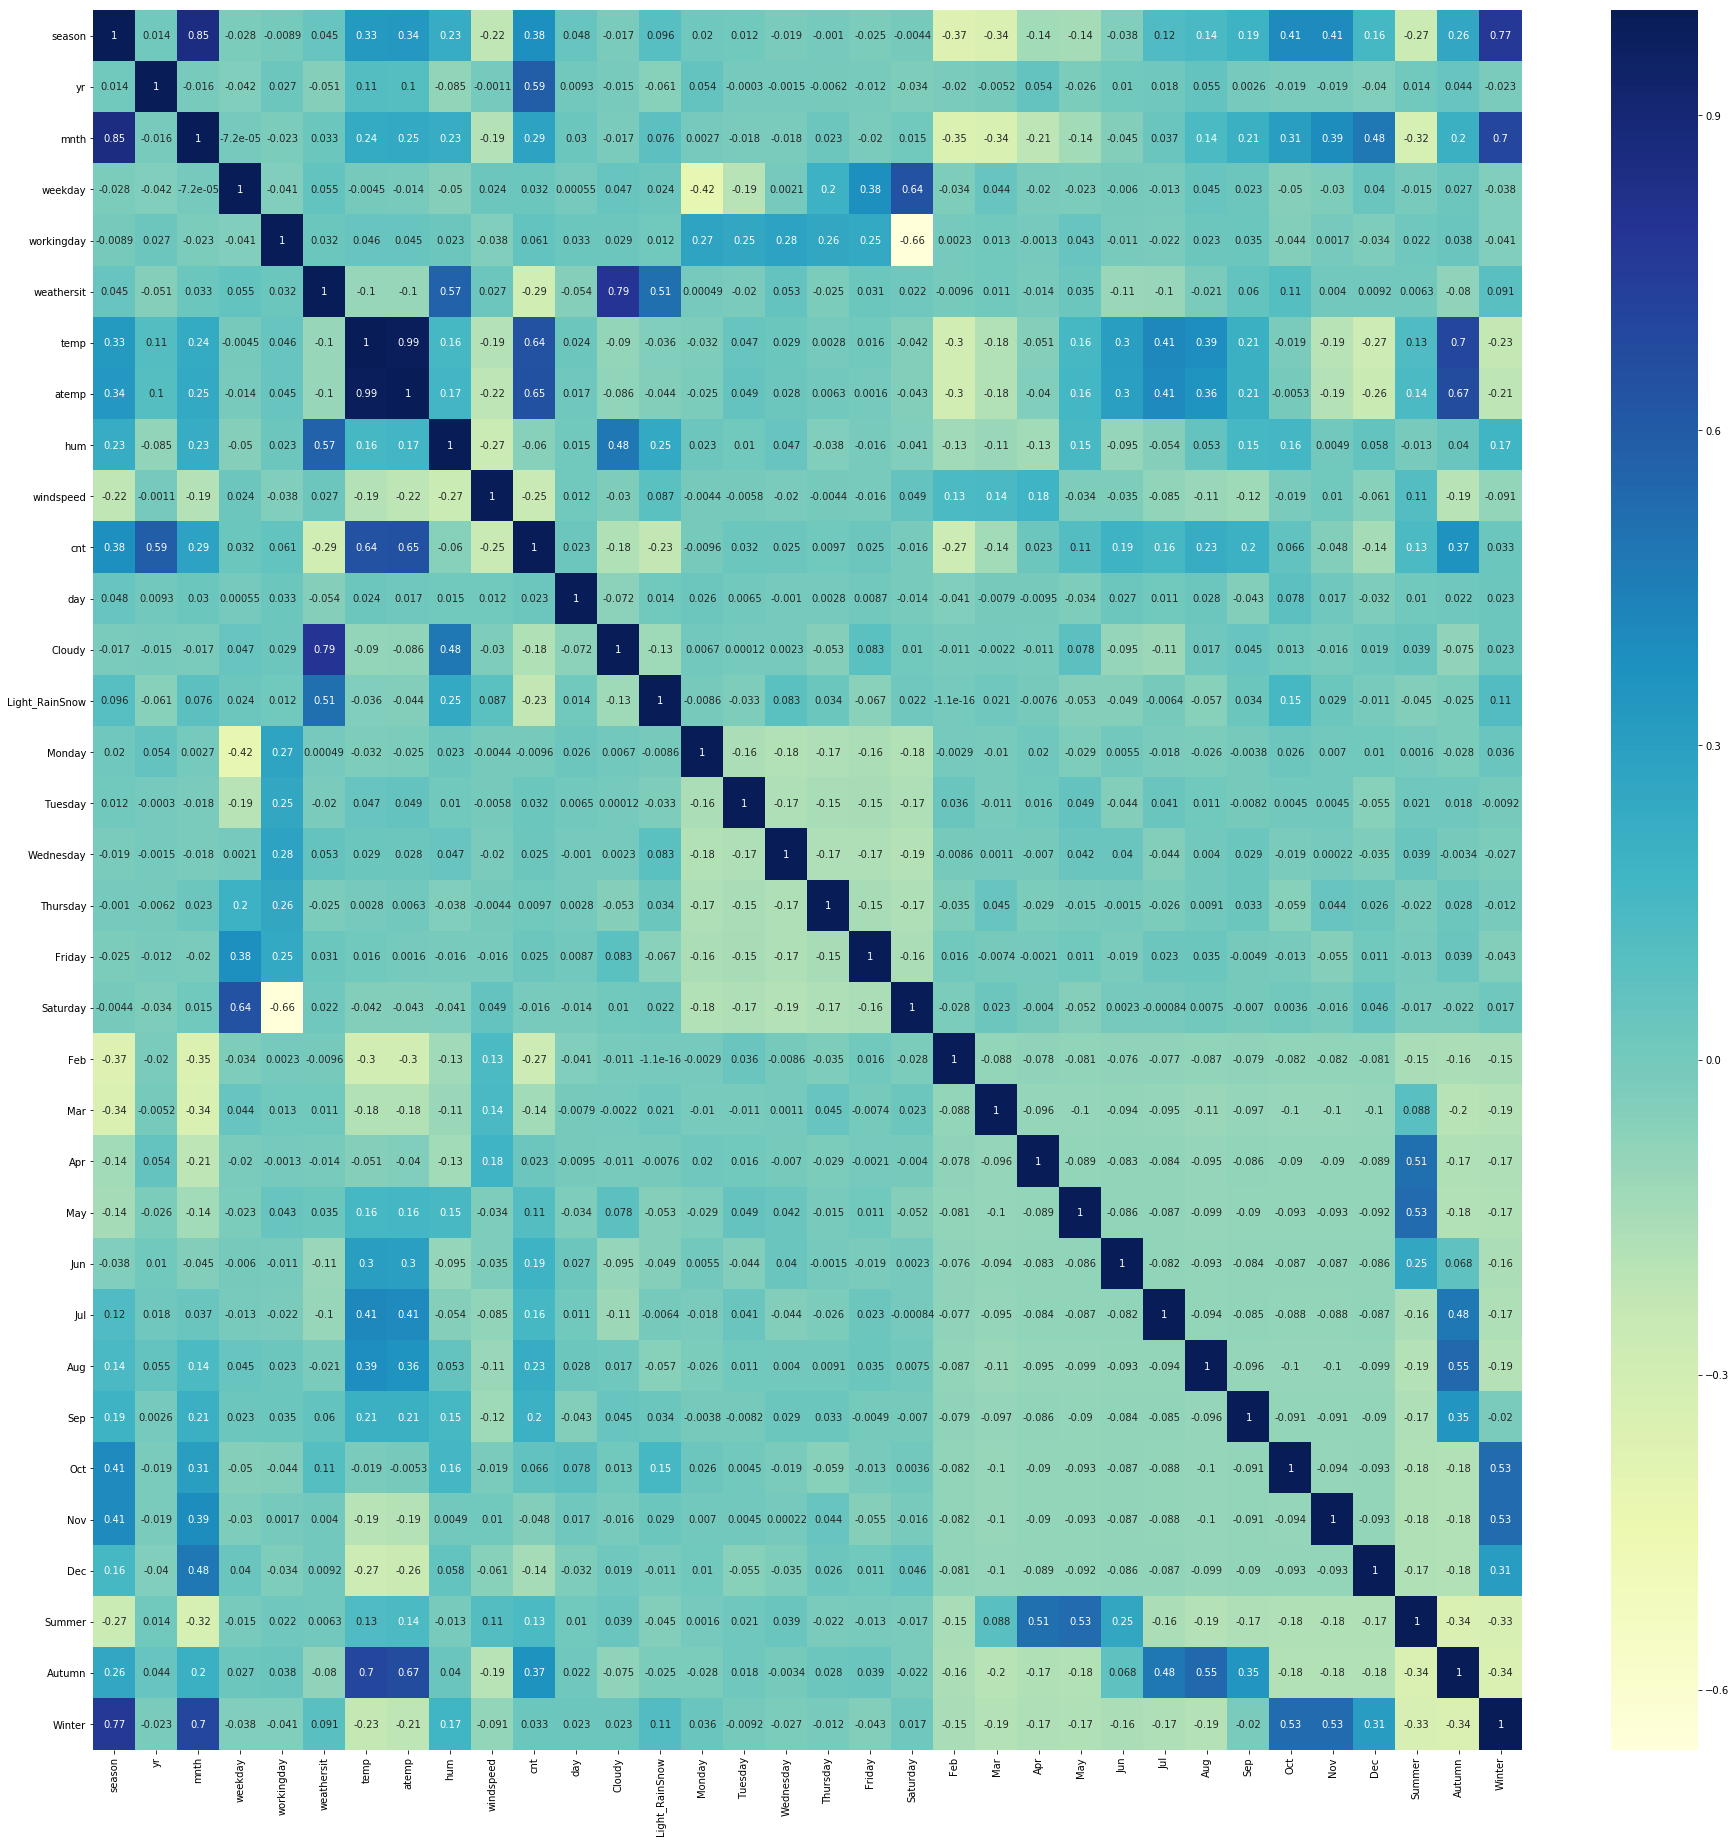

In [70]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (32, 32))
sns.heatmap(s1_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [72]:
#check column dtypes
s1_train.corr()

season        yr      mnth   weekday  workingday  \
season          1.000000  0.013873  0.852199 -0.028391   -0.008944   
yr              0.013873  1.000000 -0.016067 -0.041769    0.027372   
mnth            0.852199 -0.016067  1.000000 -0.000072   -0.022946   
weekday        -0.028391 -0.041769 -0.000072  1.000000   -0.041462   
workingday     -0.008944  0.027372 -0.022946 -0.041462    1.000000   
weathersit      0.044797 -0.050964  0.032534  0.055162    0.032116   
temp            0.328423  0.107288  0.239942 -0.004533    0.046493   
atemp           0.336924  0.104206  0.248012 -0.013921    0.045016   
hum             0.227254 -0.084792  0.227247 -0.049729    0.022694   
windspeed      -0.217511 -0.001108 -0.189035  0.023804   -0.038106   
cnt             0.384598  0.591508  0.286217  0.032137    0.061358   
day             0.048239  0.009284  0.029859  0.000555    0.032926   
Cloudy         -0.017059 -0.015469 -0.016779  0.046557    0.028505   
Light_RainSnow  0.096482 -0.060764  0.076238  0.023883    0.011940   
Monday          0.020416  0.053634  0.002727 -0.416483    0.274778   
Tuesday         0.012110 -0.000296 -0.018064 -0.191098    0.253405   
Wednesday      -0.018976 -0.001452 -0.017757  0.002114    0.283135   
Thursday       -0.001038 -0.006153  0.022749  0.196553    0.255578   
Friday         -0.024597 -0.011876 -0.019829  0.381180    0.249033   
Saturday       -0.004362 -0.033817  0.015056  0.639460   -0.657044   
Feb            -0.365131 -0.019916 -0.350842 -0.033807    0.002291   
Mar            -0.343577 -0.005172 -0.337654  0.044142    0.013003   
Apr            -0.135943  0.053776 -0.214591 -0.020296   -0.001251   
May            -0.141401 -0.025933 -0.135641 -0.023037    0.043441   
Jun            -0.038116  0.010484 -0.044954 -0.006030   -0.011011   
Jul             0.124948  0.017623  0.037449 -0.013246   -0.022204   
Aug             0.141565  0.054774  0.136511  0.044510    0.023331   
Sep             0.186810  0.002574  0.209124  0.022911    0.034995   
Oct             0.410041 -0.018790  0.306009 -0.050489   -0.044068   
Nov             0.410041 -0.018790  0.394682 -0.029696    0.001736   
Dec             0.157170 -0.040049  0.477318  0.039998   -0.033700   
Summer         -0.265522  0.013856 -0.323109 -0.015325    0.022472   
Autumn          0.259218  0.044102  0.204968  0.027223    0.038349   
Winter          0.768415 -0.022638  0.697762 -0.037700   -0.041129   

                weathersit      temp     atemp       hum  windspeed    ...     \
season            0.044797  0.328423  0.336924  0.227254  -0.217511    ...      
yr               -0.050964  0.107288  0.104206 -0.084792  -0.001108    ...      
mnth              0.032534  0.239942  0.248012  0.227247  -0.189035    ...      
weekday           0.055162 -0.004533 -0.013921 -0.049729   0.023804    ...      
workingday        0.032116  0.046493  0.045016  0.022694  -0.038106    ...      
weathersit        1.000000 -0.100549 -0.102047  0.568882   0.027311    ...      
temp             -0.100549  1.000000  0.989537  0.155415  -0.187396    ...      
atemp            -0.102047  0.989537  1.000000  0.169461  -0.215283    ...      
hum               0.568882  0.155415  0.169461  1.000000  -0.266895    ...      
windspeed         0.027311 -0.187396 -0.215283 -0.266895   1.000000    ...      
cnt              -0.292329  0.643517  0.646475 -0.059993  -0.253794    ...      
day              -0.053548  0.024255  0.016814  0.014960   0.011944    ...      
Cloudy            0.790200 -0.090161 -0.086069  0.481042  -0.030385    ...      
Light_RainSnow    0.508559 -0.036093 -0.044266  0.245038   0.086900    ...      
Monday            0.000491 -0.032126 -0.025143  0.022612  -0.004372    ...      
Tuesday          -0.020495  0.046646  0.049470  0.010123  -0.005849    ...      
Wednesday         0.053362  0.029363  0.027900  0.047185  -0.019567    ...      
Thursday         -0.024605  0.002827  0.006332 -0.038222  -0.004353    ...      
Friday            0.030877  

#### Splitting into sub set

In [80]:
y_train = s1_train.pop('cnt')
X_train = s1_train

### Step 8: Building a linear regression model

***Function to Undertake Recursive VIF analysis of a dataframe***

In [81]:
##reference: https://www.geeksforgeeks.org/multicollinearity-in-data/
def recursive_VIF(X_df,y_df):
    #create a test dataframe
    vif_df=X_df.copy()
    #empty list to hold results
    dropped_features=[]
    selected_features=[]
    dropped_VIF_df=pd.DataFrame(columns=['Feature', 'VIF_Value'])
    #shuffle the column ordering
    #import random
    #column_shuffle=vif_df.columns.tolist() #convert pandas index to list
    #random.shuffle(column_shuffle) #shuffle list
    #shuffle dataframe columns
    #set_column_sequence(vif_df, column_shuffle, front=True) #not required
    Y = y_df
    features = vif_df.columns
    X = vif_df[features]
    #reference: https://github.com/statsmodels/statsmodels/issues/2376
    #add constant prior calculating VIF
    X = sm.add_constant(X)
    # calculate the variance inflation factor
    from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
     # compare with each column
    [vif(vif_df[features].values, index) for index in range(len(features))]
    # compare with each columns
    for i in range(len(features)):
        vif_list = [vif(vif_df[features].values, index) for index in range(len(features))]
        maxvif = max(vif_list)
        drop_index = vif_list.index(maxvif)
        dropped_VIF_df.loc[len(dropped_VIF_df.index)] = [features[drop_index], maxvif]
        #print("Max VIF value is {} for independent variable {} at index {}.".format(maxvif,features[drop_index],drop_index))  
        if maxvif > 4.99:
            #print("Deleting", features[drop_index])
            dropped_features.append(features[drop_index])
            features = features.delete(drop_index)
    #print("Final Independent_variables are {}\n".format(features))
    selected_features=features
    return dropped_features,selected_features,dropped_VIF_df

In [82]:
VIF_drop,VIF_select,dropped_VIF_df=recursive_VIF(X_train,y_train)

In [83]:
print ("Following features ab-initio display high multicollinearity\n {}". format(dropped_VIF_df))

Following features ab-initio display high multicollinearity
        Feature   VIF_Value
0       season         inf
1         mnth         inf
2      weekday         inf
3   workingday         inf
4   weathersit         inf
5         temp  445.010961
6        atemp   40.259994
7          hum   16.982177
8       Autumn   15.205557
9       Winter    8.027573
10      Summer    6.208888
11   windspeed    4.360432
12   windspeed    4.360432
13   windspeed    4.360432
14   windspeed    4.360432
15   windspeed    4.360432
16   windspeed    4.360432
17   windspeed    4.360432
18   windspeed    4.360432
19   windspeed    4.360432
20   windspeed    4.360432
21   windspeed    4.360432
22   windspeed    4.360432
23   windspeed    4.360432
24   windspeed    4.360432
25   windspeed    4.360432
26   windspeed    4.360432
27   windspeed    4.360432
28   windspeed    4.360432
29   windspeed    4.360432
30   windspeed    4.360432
31   windspeed    4.360432
32   windspeed    4.360432


### ***Adding Variables that are correlated based on VIF analysis***

##### ***Extracting Results from regression model***

In [84]:
#References:-
#https://stackoverflow.com/questions/48522609/how-to-retrieve-model-estimates-from-statsmodels
#https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html
#https://stackoverflow.com/questions/37508158/how-to-extract-a-particular-value-from-the-ols-summary-in-pandas
#https://gist.github.com/zhiyzuo/972b8b95e115c44d6805c929b7b4e2ca
#https://stackoverflow.com/questions/47388258/how-to-extract-the-regression-coefficient-from-statsmodels-api
#https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe/52976810

#### ***Function for comparative analysis with RFE***

In [85]:
def RFE_compare(X_df,y_df,features2compare):
    lm = LinearRegression()
    lm.fit(X_df, y_df)
     #for starts limit the no of features selected to that gereated in recursive VIF
    rfe = RFE(lm, n_features_to_select=len(features2compare))
    rfe = rfe.fit(X_df, y_df)
    list(zip(X_df.columns,rfe.support_,rfe.ranking_))
    support_col = X_df.columns[rfe.support_]
    unsuport_col=X_df.columns[~rfe.support_]
    #get common columns between features2compare and RFE top features
    RFE_list=features2compare
    common_features=list(set(feature_list) & set(RFE_list))
    #get diffirece if features
    feature_rejected=list(set(X_df.columns.tolist())-set(feature_list))
    RFE_rejected=X_df.columns[~rfe.support_]
    common_rejected=list(set(feature_rejected) & set(RFE_rejected))
    return common_features,common_rejected

#### ***Function to calculate RFE***

In [86]:
def RFE_analysis(X_df,y_df,num_features):
    lm = LinearRegression()
    lm.fit(X_df, y_df)
     #for starts limit the no of features selected to that gereated in recursive VIF
    rfe = RFE(lm, n_features_to_select=num_features)
    rfe = rfe.fit(X_df, y_df)
    list(zip(X_df.columns,rfe.support_,rfe.ranking_))
    support_col = X_df.columns[rfe.support_]
    unsuport_col=X_df.columns[~rfe.support_]
    return support_col,unsuport_col

In [87]:
 #Obtain regression model coefficients from statsmodels 
 #Reference: https://gist.github.com/zhiyzuo/972b8b95e115c44d6805c929b7b4e2ca
def get_coef_table(lin_reg):
    ''' lin_reg is a fitted statsmodels regression model
    Return a dataframe containing coefficients, pvalues, and the confidence intervals
    '''
    err_series = lin_reg.params - lin_reg.conf_int()[0]
    coef_df = pd.DataFrame({'coef': lin_reg.params.values[1:],
                            'ci_err': err_series.values[1:],
                            'pvalue': lin_reg.pvalues.round(4).values[1:],
                            'varname': err_series.index.values[1:]
                           })
    return coef_df

In [88]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

In [89]:
#create a function to undertake linear_regression and undertake analysis
def linear_regression(df_indices,df_Xtrain,df_ytrain):
    #undertake regression
    X_train_lm = df_Xtrain[df_indices]
    X_train_lm = sm.add_constant(X_train_lm)
    lr_results = sm.OLS(df_ytrain, X_train_lm).fit() #create model
    #calculate VIF
    vif = pd.DataFrame()
    vif['varname'] = X_train_lm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False) 
    vif=vif.set_index('varname')#change df index to varname
    #process lr summary results
    df_lr_sum=get_coef_table(lr_results)#This works better :-)!
    df_lr_sum.set_index('varname')#change df index to varname
    df_lr_sum = df_lr_sum.sort_values(by=['pvalue'], ascending=False)#sort the dataframe by p value and in descending order
    #to undertake holistic analysis look at VIF and P values
    lr_sum=df_lr_sum.merge(vif, on='varname', how='left')#join both dataframes 
    lr_sum=lr_sum.set_index('varname')
    return lr_results, vif, lr_sum

In [90]:
def iterate_recursion(feature_index,Xtrain,ytrain):
    lr,vif,lr_summary =linear_regression(feature_index,Xtrain,ytrain)
    #print ("Length of index is {}\n\r".format(len(feature_index)))
    lr_summary.sort_values(by=['VIF'], ascending=False, inplace=True)#sort the dataframe by vif and in descending order
    ##testing recursive modelling to save time
    lr_summary=lr_summary.reset_index()
    print(lr_summary)
    top_feature=lr_summary.varname.iloc[0]
    feature_pvalue=lr_summary.pvalue.iloc[0]
    feature_vif=lr_summary.VIF.iloc[0]
    if (feature_vif>=4):
        #print("VIF of {} is {}(>4)".format(top_feature,feature_vif))
        #print("dropping feature {} and redoing regression..".format(top_feature))
        #drop feature from index
        feature_index=feature_index.drop(top_feature)
        #recurse regression
        lr,vif,lr_summary,feature_index=iterate_recursion(feature_index,Xtrain,ytrain)
    
    lr_summary.sort_values(by=['pvalue'], ascending=False, inplace=True)#sort the dataframe by vif and in descending order
    ##testing recursive modelling to save time
    top_feature=lr_summary.varname.iloc[0]
    feature_pvalue=lr_summary.pvalue.iloc[0]
    if (feature_pvalue>=0.05):
        #print("p value of {} is {}(>0.05)".format(top_feature,feature_pvalue))
        #print("dropping feature {} and redoing regression..".format(top_feature))
        #drop feature from index
        feature_index=feature_index.drop(top_feature)
        #recurse regression
        lr,vif,lr_summary,feature_index=iterate_recursion(feature_index,Xtrain,ytrain)
    print ("Final feature count is {}".format(len(feature_index)))
    return lr,vif,lr_summary,feature_index



#### ***Iteration 1: Undertake feature analysis based on VIF and p value***

In [91]:
iv=s1_train.columns
regression_summary,VIF,feature_summary,feature_list =iterate_recursion(iv,X_train,y_train)
print (VIF)

           varname      coef    ci_err  pvalue        VIF
0         Thursday  0.000756  0.018996  0.9377        inf
1             mnth  0.068896  0.065309  0.0387        inf
2          weekday  0.033444  0.015167  0.0000        inf
3       weathersit -0.126169  0.025228  0.0000        inf
4   Light_RainSnow -0.127611  0.027994  0.0000        inf
5           season  0.087924  0.034273  0.0000        inf
6              Sep  0.094782  0.037885  0.0000        inf
7              Mar  0.056558  0.037452  0.0032        inf
8           Summer  0.058587  0.041325  0.0056        inf
9       workingday  0.020393  0.014774  0.0069        inf
10        Saturday  0.020835  0.015637  0.0091        inf
11             Nov -0.051276  0.040003  0.0121        inf
12             Dec -0.054130  0.042348  0.0123        inf
13             Jul -0.006282  0.059255  0.8351        inf
14             May  0.068776  0.056547  0.0172        inf
15             Apr  0.047097  0.055702  0.0973        inf
16            

           varname      coef    ci_err  pvalue   VIF
0           Autumn -0.032182  0.044310  0.1542  6.20
1           Summer  0.041755  0.043777  0.0615  5.78
2           season  0.172798  0.048875  0.0000  5.34
3            atemp  0.447037  0.075083  0.0000  4.14
4              Nov -0.006336  0.056010  0.8242  4.03
5              Oct  0.051199  0.055920  0.0726  4.02
6              May  0.081938  0.053210  0.0026  3.56
7              Apr  0.047885  0.052768  0.0752  3.28
8              Dec -0.000264  0.046372  0.9911  2.71
9       workingday  0.005778  0.026338  0.6666  2.37
10             Jun  0.056042  0.045370  0.0156  2.31
11          Monday  0.006250  0.032931  0.7094  2.27
12      weathersit -0.122319  0.041846  0.0000  2.14
13             hum -0.150265  0.076565  0.0001  2.03
14             Mar  0.060152  0.036664  0.0014  1.94
15         Tuesday  0.012067  0.032135  0.4610  1.92
16       Wednesday  0.016797  0.029631  0.2659  1.91
17             Aug  0.065457  0.036497  0.0005

In [92]:
len(VIF)

17

#### ***Undertake Recursive Feature Analysis with RFE selected features***

In [93]:
feature2select=26
features_supported,features_rejected=RFE_analysis(X_train,y_train,feature2select)
print("No of supported features are {},{}n".format(len(features_supported),features_supported))
regression_summary_RFE,VIF_RFE,feature_summary_RFE,feature_list_RFE =iterate_recursion(features_supported,X_train,y_train)
print (VIF_RFE)

No of supported features are 26,Index(['season', 'mnth', 'weekday', 'workingday', 'weathersit', 'Cloudy',
       'Light_RainSnow', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Summer', 'Autumn', 'Winter'],
      dtype='object')n
           varname      coef    ci_err  pvalue           VIF
0        Wednesday  0.015142  0.032441  0.3596           inf
1           Autumn  0.015497  0.074541  0.6831           inf
2   Light_RainSnow -0.180438  0.047166  0.0000           inf
3           Winter  0.100460  0.049119  0.0001           inf
4       workingday  0.030155  0.026430  0.0254           inf
5          weekday  0.029394  0.027058  0.0333           inf
6           Summer  0.042066  0.073735  0.2629           inf
7         Saturday  0.015920  0.028002  0.2645           inf
8       weathersit -0.180543  0.039486  0.0000           inf
9           Monday  0.006757  0.033534  0.6924       

           varname      coef    ci_err  pvalue   VIF
0              Mar  0.161422  0.058329  0.0000  1.48
1              Aug  0.399637  0.058631  0.0000  1.47
2              Oct  0.337663  0.061271  0.0000  1.46
3              Nov  0.222829  0.060731  0.0000  1.43
4              May  0.336874  0.061108  0.0000  1.42
5              Dec  0.148169  0.061083  0.0000  1.42
6   Light_RainSnow -0.179078  0.099955  0.0005  1.40
7       weathersit -0.175087  0.061731  0.0000  1.40
8              Jul  0.361162  0.063454  0.0000  1.40
9              Sep  0.417065  0.062130  0.0000  1.40
10             Apr  0.269467  0.062522  0.0000  1.39
11             Jun  0.378755  0.063924  0.0000  1.39
12          Friday -0.011708  0.048700  0.6369  1.30
13         weekday  0.039312  0.046829  0.0997  1.22
14      workingday  0.031817  0.032738  0.0568  1.10
           varname      coef    ci_err  pvalue   VIF
0              Mar  0.161880  0.058252  0.0000  1.48
1              Aug  0.399705  0.058584  0.0000

#### ***Iteration 2:Undertake a comparative feature analysis of VIF generated above with RFE selected features***

In [94]:
fea2comp=VIF.index.tolist()
feature_common,feature_rejected=RFE_compare(X_train,y_train,fea2comp)
print ("Common features are:\n{}\n".format(feature_common))
print ("UnCommon features are:\n{}".format(feature_rejected))

Common features are:
['windspeed', 'Apr', 'May', 'Light_RainSnow', 'Nov', 'Aug', 'Oct', 'Dec', 'atemp', 'Sep', 'yr', 'Jun', 'hum', 'weekday', 'weathersit', 'Mar']

UnCommon features are:
['day', 'Jul', 'Feb', 'temp']


#### ***Iteration 3: Undertake recursive VIF and p value analysis based on VIF results taken earlier***

In [95]:
regression_summary,VIF,feature_summary,feature_list2 =iterate_recursion(VIF_select,X_train,y_train)
fea2comp=VIF.index.tolist()
feature_common1,feature_rejected1=RFE_compare(X_train,y_train,fea2comp)
print ("Common features are:{}".format(feature_common1))
print ("UnCommon features are:{}".format(feature_rejected1))

           varname      coef    ci_err  pvalue   VIF
0              Mar  0.190243  0.041032  0.0000  1.93
1              Aug  0.382576  0.041213  0.0000  1.91
2              Oct  0.352829  0.042670  0.0000  1.86
3              Nov  0.245754  0.042229  0.0000  1.82
4              May  0.359077  0.042467  0.0000  1.81
5        Wednesday  0.057032  0.032319  0.0006  1.81
6              Dec  0.171415  0.042426  0.0000  1.80
7              Sep  0.414974  0.043160  0.0000  1.79
8         Saturday  0.059111  0.032411  0.0004  1.78
9              Apr  0.281115  0.043607  0.0000  1.78
10             Jul  0.358295  0.043980  0.0000  1.77
11          Monday  0.029364  0.032523  0.0767  1.76
12             Jun  0.386414  0.044020  0.0000  1.73
13        Thursday  0.052848  0.033738  0.0022  1.71
14          Friday  0.060837  0.034078  0.0005  1.68
15         Tuesday  0.047229  0.033688  0.0061  1.68
16             Feb  0.066358  0.045481  0.0043  1.67
17       windspeed -0.190996  0.054986  0.0000

#### ***Build model based on values derived in Iteration 1***

In [96]:
X_train_lm = X_train[feature_list]
X_train_lm = sm.add_constant(X_train_lm)
lr_final = sm.OLS(y_train, X_train_lm).fit()
y_train_cnt = lr_final.predict(X_train_lm)
lr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     147.8
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          2.48e-176
Time:                        18:09:26   Log-Likelihood:                 486.61
No. Observations:                 510   AIC:                            -939.2
Df Residuals:                     493   BIC:                            -867.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1953      0.030      6.451      0.000       0.136       0.255
yr                 0.2344      0.009     27.470      0.000       0.218       0.251
weekday            0.0497      0.013      3.926      0.000       0.025       0.075
weathersit        -0.1126      0.022     -5.074      0.000      -0.156      -0.069
atemp              0.5347      0.027     19.509      0.000       0.481       0.589
hum               -0.1582      0.040     -3.914      0.000      -0.238      -0.079
windspeed         -0.1879      0.027     -6.907      0.000      -0.241      -0.134
Light_RainSnow    -0.1232      0.029     -4.188      0.000      -0.181      -0.065
Mar                0.0654      0.016      4.057      0.000       0.034       0.097
Apr                0.1100      0.018      6.228      0.000       0.075       0.145
May                0.1313      0.018      7.316      0.000       0.096       0.167
Jun                0.0886      0.019      4.550      0.000       0.050       0.127
Aug                0.0861      0.018      4.719      0.000       0.050       0.122
Sep                0.1683      0.018      9.107      0.000       0.132       0.205
Oct                0.1806      0.017     10.425      0.000       0.147       0.215
Nov                0.1356      0.017      8.034      0.000       0.102       0.169
Dec                0.0928      0.017      5.343      0.000       0.059       0.127
==============================================================================
Omnibus:                       72.941   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.914
Skew:                          -0.757   Prob(JB):                     2.09e-37
Kurtosis:                       5.379   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ***Build model based on values derived in Iteration 2***

In [97]:
#build  model based on RFE common analysis
X_train_lm_RFE_eval = X_train[feature_common]
X_train_lm_RFE_eval = sm.add_constant(X_train_lm_RFE_eval)
lr_final_RFE_eval = sm.OLS(y_train, X_train_lm_RFE_eval).fit()
y_train_cnt_RFE_eval = lr_final_RFE_eval.predict(X_train_lm_RFE_eval)
lr_final_RFE_eval.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     147.8
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          2.48e-176
Time:                        18:09:32   Log-Likelihood:                 486.61
No. Observations:                 510   AIC:                            -939.2
Df Residuals:                     493   BIC:                            -867.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1953      0.030      6.451      0.000       0.136       0.255
windspeed         -0.1879      0.027     -6.907      0.000      -0.241      -0.134
Apr                0.1100      0.018      6.228      0.000       0.075       0.145
May                0.1313      0.018      7.316      0.000       0.096       0.167
Light_RainSnow    -0.1232      0.029     -4.188      0.000      -0.181      -0.065
Nov                0.1356      0.017      8.034      0.000       0.102       0.169
Aug                0.0861      0.018      4.719      0.000       0.050       0.122
Oct                0.1806      0.017     10.425      0.000       0.147       0.215
Dec                0.0928      0.017      5.343      0.000       0.059       0.127
atemp              0.5347      0.027     19.509      0.000       0.481       0.589
Sep                0.1683      0.018      9.107      0.000       0.132       0.205
yr                 0.2344      0.009     27.470      0.000       0.218       0.251
Jun                0.0886      0.019      4.550      0.000       0.050       0.127
hum               -0.1582      0.040     -3.914      0.000      -0.238      -0.079
weekday            0.0497      0.013      3.926      0.000       0.025       0.075
weathersit        -0.1126      0.022     -5.074      0.000      -0.156      -0.069
Mar                0.0654      0.016      4.057      0.000       0.034       0.097
==============================================================================
Omnibus:                       72.941   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.914
Skew:                          -0.757   Prob(JB):                     2.09e-37
Kurtosis:                       5.379   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ***Build model based on values derived in Iteration 3***

In [98]:
#build  model based on VIF Analysis
X_train_lm_RFE_eval1 = X_train[feature_common1]
X_train_lm_RFE_eval1 = sm.add_constant(X_train_lm_RFE_eval1)
lr_final_RFE_eval1 = sm.OLS(y_train, X_train_lm_RFE_eval1).fit()
y_train_cnt_RFE_eval1 = lr_final_RFE_eval1.predict(X_train_lm_RFE_eval1)
lr_final_RFE_eval1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     74.99
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          2.77e-103
Time:                        18:09:36   Log-Likelihood:                 302.04
No. Observations:                 510   AIC:                            -578.1
Df Residuals:                     497   BIC:                            -523.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3408      0.018     18.443      0.000       0.304       0.377
windspeed         -0.2382      0.037     -6.428      0.000      -0.311      -0.165
Apr                0.1463      0.025      5.828      0.000       0.097       0.196
May                0.2103      0.024      8.697      0.000       0.163       0.258
Light_RainSnow    -0.2431      0.036     -6.692      0.000      -0.314      -0.172
Nov                0.1054      0.024      4.398      0.000       0.058       0.153
Aug                0.2417      0.023     10.420      0.000       0.196       0.287
Oct                0.2013      0.024      8.310      0.000       0.154       0.249
Dec                0.0285      0.024      1.179      0.239      -0.019       0.076
Sep                0.2674      0.025     10.784      0.000       0.219       0.316
yr                 0.2536      0.012     20.999      0.000       0.230       0.277
Jun                0.2593      0.025     10.242      0.000       0.210       0.309
Mar                0.0560      0.023      2.433      0.015       0.011       0.101
==============================================================================
Omnibus:                       11.511   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.845
Skew:                          -0.155   Prob(JB):                     0.000133
Kurtosis:                       3.863   Cond. No.                         9.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

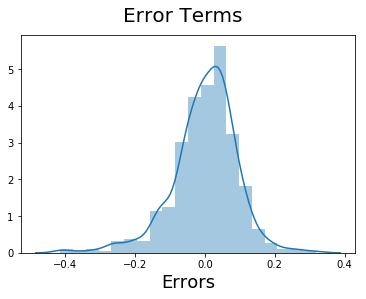

In [99]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

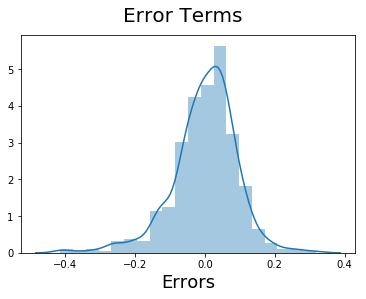

In [100]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt_RFE_eval), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

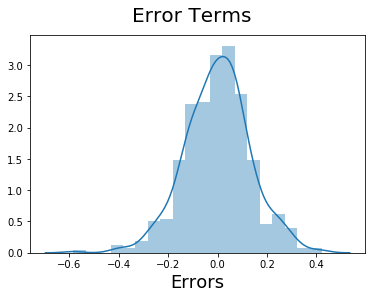

In [101]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt_RFE_eval1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

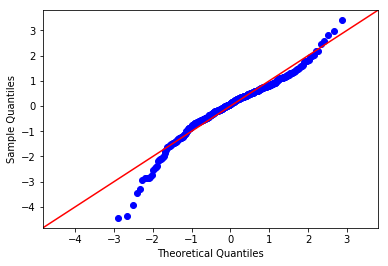

In [102]:
#Reference: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot
#           https://stats.stackexchange.com/questions/111010/interpreting-qqplot-is-there-any-rule-of-thumb-to-decide-for-non-normality/111013#111013

sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

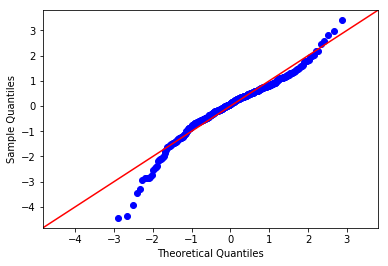

In [103]:
#Reference: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot
#           https://stats.stackexchange.com/questions/111010/interpreting-qqplot-is-there-any-rule-of-thumb-to-decide-for-non-normality/111013#111013

sm.qqplot((y_train - y_train_cnt_RFE_eval), fit=True, line='45')
plt.show()

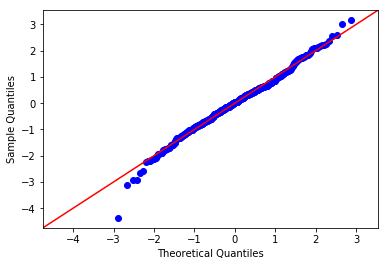

In [104]:
#Reference: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot
#           https://stats.stackexchange.com/questions/111010/interpreting-qqplot-is-there-any-rule-of-thumb-to-decide-for-non-normality/111013#111013

sm.qqplot((y_train - y_train_cnt_RFE_eval1), fit=True, line='45')
plt.show()

### **Step 9: Making prediction based on model coeff.**

###### ***Scaling Test Set***

In [105]:
num_vars=s1_test.columns.tolist()
num_vars.remove('cnt')
s1_test[num_vars] = scaler.transform(s1_test[num_vars])

ValueError: operands could not be broadcast together with shapes (219,33) (34,) (219,33) 

In [401]:
s1_test.describe()

season          yr        mnth     weekday  workingday  weathersit  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     2.456621    0.479452    6.474886    3.018265    0.735160    1.374429   
std      1.109463    0.500722    3.421875    1.988415    0.442259    0.538843   
min      1.000000    0.000000    1.000000    0.000000    0.000000    1.000000   
25%      1.000000    0.000000    4.000000    1.000000    0.000000    1.000000   
50%      2.000000    0.000000    6.000000    3.000000    1.000000    1.000000   
75%      3.000000    1.000000    9.000000    5.000000    1.000000    2.000000   
max      4.000000    1.000000   12.000000    6.000000    1.000000    3.000000   

             temp       atemp         hum   windspeed  ...         Sep  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean    20.815737   24.255828   61.961883   12.600130  ...    0.086758   
std      7.689600    8.299641   14.456669    4.984858  ...    0.282125   
min      3.957390    4.941955   25.416700    1.500244  ...    0.000000   
25%     14.093750   17.085500   51.166700    9.021282  ...    0.000000   
50%     20.807500   24.873150   60.916700   12.167200  ...    0.000000   
75%     27.401653   31.155725   72.192050   15.395629  ...    0.000000   
max     34.815847   41.318550   97.250000   27.999836  ...    1.000000   

              Oct         Nov         Dec      Second       Third      Fourth  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.082192    0.073059    0.086758    0.273973    0.164384    0.328767   
std      0.275286    0.260830    0.282125    0.447017    0.371472    0.470841   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           Summer      Autumn      Winter  
count  219.000000  219.000000  219.000000  
mean     0.264840    0.246575    0.232877  
std      0.442259    0.432005    0.423633  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 59 columns]

###### ***Splitting Test Data***

In [85]:
y_test = s1_test.pop('cnt')
X_test = s1_test

In [86]:
X_test.columns

Index(['yr', 'workingday', 'casual', 'registered', 'day', 'Light_air',
       'Light_Breeze', 'Gentle_Breeze', 'Moderate_Breeze', 'Fresh_Breeze',
       'Cold', 'Quite_Cool', 'Cool', 'Lower_Ideal', 'Ideal', 'Quite_Warm',
       'Hot', 'Cloudy', 'Light_RainSnow', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Much_Dry', 'Dry', 'Near_Perfect',
       'Perfect', 'About_Perfect', 'Sweaty', 'Too_Humid', 'Gross', 'Feb',
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Second', 'Third', 'Fourth', 'Summer', 'Autumn', 'Winter'],
      dtype='object')

In [87]:
#adding constant
X1_test = X_test[feature_list]
X1_test = sm.add_constant(X1_test)

X2_test = X_test[feature_common1]
X2_test = sm.add_constant(X2_test)

# X3_test = X_test[feature_list]
# X3_test = sm.add_constant(X3_test)

In [88]:
##get diffirence between two lists
# set(X_test.columns.tolist())-set(feature_list)
# len(feature_list)

In [89]:
# Making predictions using model

y_pred1 = lr_final.predict(X1_test)

In [90]:
lr_final_RFE_eval1.params

const             4727.802412
Light_RainSnow   -2038.752174
Cool             -2321.732731
Wednesday          155.462849
Cold             -3780.148354
Sweaty            -262.243119
yr                1936.912080
Cloudy            -456.530086
Friday             186.172053
Gross             -458.660200
Quite_Cool       -3388.665425
Too_Humid         -624.620719
Light_Breeze       286.192985
Lower_Ideal      -1245.613405
dtype: float64

In [91]:
# Making predictions using model

y_pred2 = lr_final_RFE_eval1.predict(X2_test)

In [92]:
# # Making predictions using model

# y_pred3 = lr_final_RFE_eval1.predict(X3_test)

### **Step 10: Model Evaluation**

```
Reference:
https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/
```



In [93]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


NameError: name 'y_pred' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred2)
fig.suptitle('y_test vs y_pred2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred2', fontsize = 16)      


In [ ]:
#Reference: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot
#           https://stats.stackexchange.com/questions/111010/interpreting-qqplot-is-there-any-rule-of-thumb-to-decide-for-non-normality/111013#111013

sm.qqplot((y_test - y_pred), fit=True, line='45')
plt.show()

In [ ]:
#Reference: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot
#           https://stats.stackexchange.com/questions/111010/interpreting-qqplot-is-there-any-rule-of-thumb-to-decide-for-non-normality/111013#111013

sm.qqplot((y_test - y_pred2), fit=True, line='45')
plt.show()

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred2), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [ ]:
#plt.scatter(y_pred,(y_test - y_pred))
#plt.show()
sns.regplot(y_pred,y_test-y_pred,'r')
plt.show()

In [ ]:
#plt.scatter(y_pred,(y_test - y_pred))
#plt.show()
sns.regplot(y_pred2,y_test-y_pred2,'r')
plt.show()

In [ ]:
# Plotting Actual vs Predicted No of Shares 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Bike Sharing Counts');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()


In [ ]:
# Plotting Actual vs Predicted No of Shares 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred2)),y_pred2)
plt.legend([l1,l2],['Actual','Predicted2'])
plt.title('Predicted2 vs Actual No of Bike Sharing Counts');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()


In [ ]:
# Plotting Actual vs Predicted No of Shares 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_pred)),y_pred)
l2, = ax.plot(range(len(y_pred2)),y_pred2)
plt.legend([l1,l2],['Predicted 1','Predicted 2'])
plt.title('Predicted 1 vs Predicted 2 No of Bike Sharing Counts');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()


### ***Regression Metrics***

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
mse_train = mean_squared_error(y_train, y_train_cnt)
mae_train = mean_absolute_error(y_train, y_train_cnt)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_cnt)
MAPE_test = np.mean(np.abs(y_pred - y_test) / (y_test + 1e-5))
MAPE_train = np.mean(np.abs(y_train_cnt - y_train) / (y_train + 1e-5))
print('R-squared for train data:',round(r2_train,2))
print('R-squared for test data:',round(r2_test,2))
print('Mean Squared Error for train data',round(mse_train,3))
print('Mean Absolute Error for train data',round(mae_train,3))
print('Mean Squared Error for test data',round(mse_test,3))
print('Mean Absolute Error for test data',round(mae_test,3))
print('Mean Absolute Percentage Error for test data',round(MAPE_test,3))
print('Mean Absolute Percentage Error for train data',round(MAPE_train,3))

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
mse_train = mean_squared_error(y_train, y_train_cnt_RFE_eval1)
mae_train = mean_absolute_error(y_train, y_train_cnt_RFE_eval1)
mse_test = mean_squared_error(y_test, y_pred2)
mae_test = mean_absolute_error(y_test, y_pred2)
r2_test = r2_score(y_test, y_pred2)
r2_train = r2_score(y_train, y_train_cnt_RFE_eval1)
MAPE_test = np.mean(np.abs(y_pred2 - y_test) / (y_test + 1e-5))
MAPE_train = np.mean(np.abs(y_train_cnt_RFE_eval1 - y_train) / (y_train + 1e-5))
print('R-squared for train data:',round(r2_train,2))
print('R-squared for test data:',round(r2_test,2))
print('Mean Squared Error for train data',round(mse_train,3))
print('Mean Absolute Error for train data',round(mae_train,3))
print('Mean Squared Error for test data',round(mse_test,3))
print('Mean Absolute Error for test data',round(mae_test,3))
print('Mean Absolute Percentage Error for test data',round(MAPE_test,3))
print('Mean Absolute Percentage Error for train data',round(MAPE_train,3))